In [34]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("Bank_Churn.csv")
df.sample(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2442,2443,15772632,Ts'ui,680,France,Female,34,1,0.00,2,1,0,167035.07,0
1372,1373,15723006,Gorbunova,489,France,Male,38,8,0.00,2,0,1,196990.79,0
4336,4337,15771742,Boyle,580,Germany,Male,38,9,115442.19,2,1,0,128481.50,1


In [38]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

In [39]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9892,604,Spain,Male,40,5,155455.43,1,0,1,113581.85,0
6562,720,France,Male,44,3,86102.27,1,1,0,180134.88,1
5208,779,Spain,Female,38,7,0.00,2,1,1,138542.87,0


In [40]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [41]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

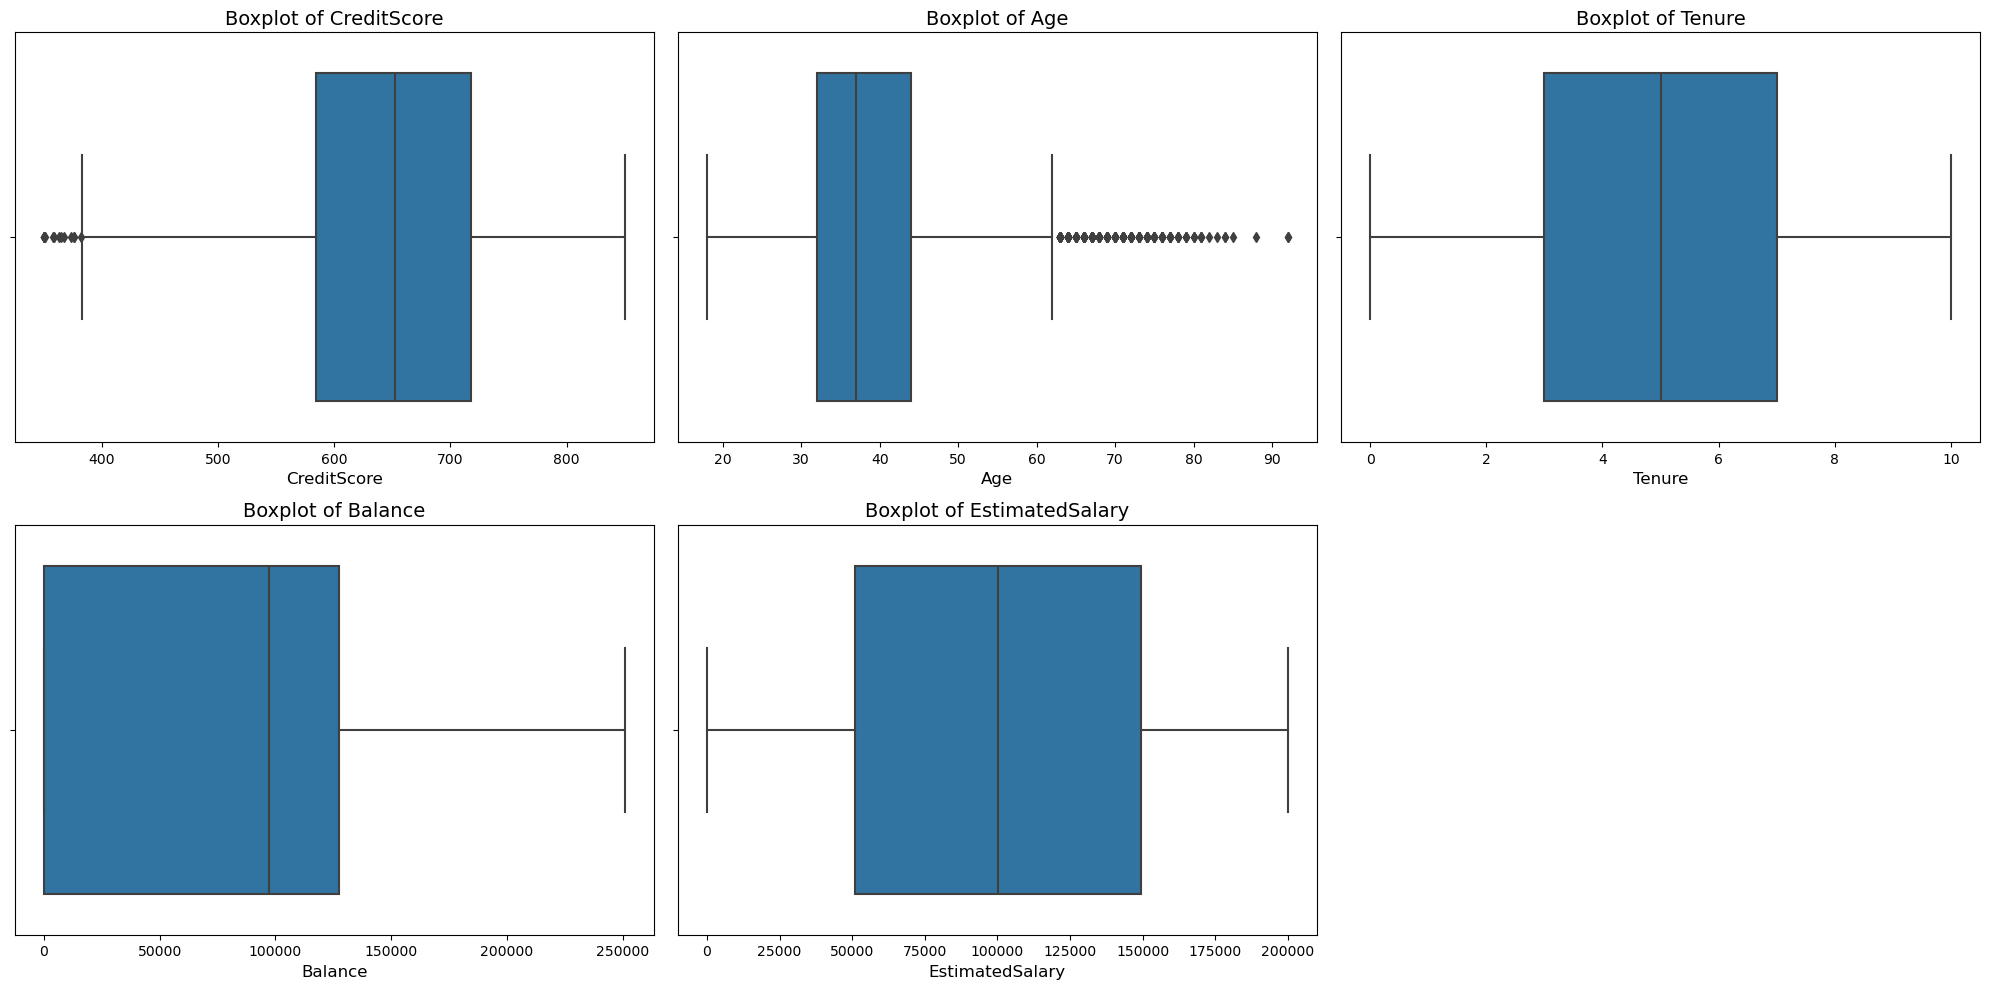

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create subplots: 2 rows × 3 columns with increased size
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()  # Flatten to access via a single loop

# Loop through features and plot boxplots
for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

# Hide any unused subplot if features < total subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

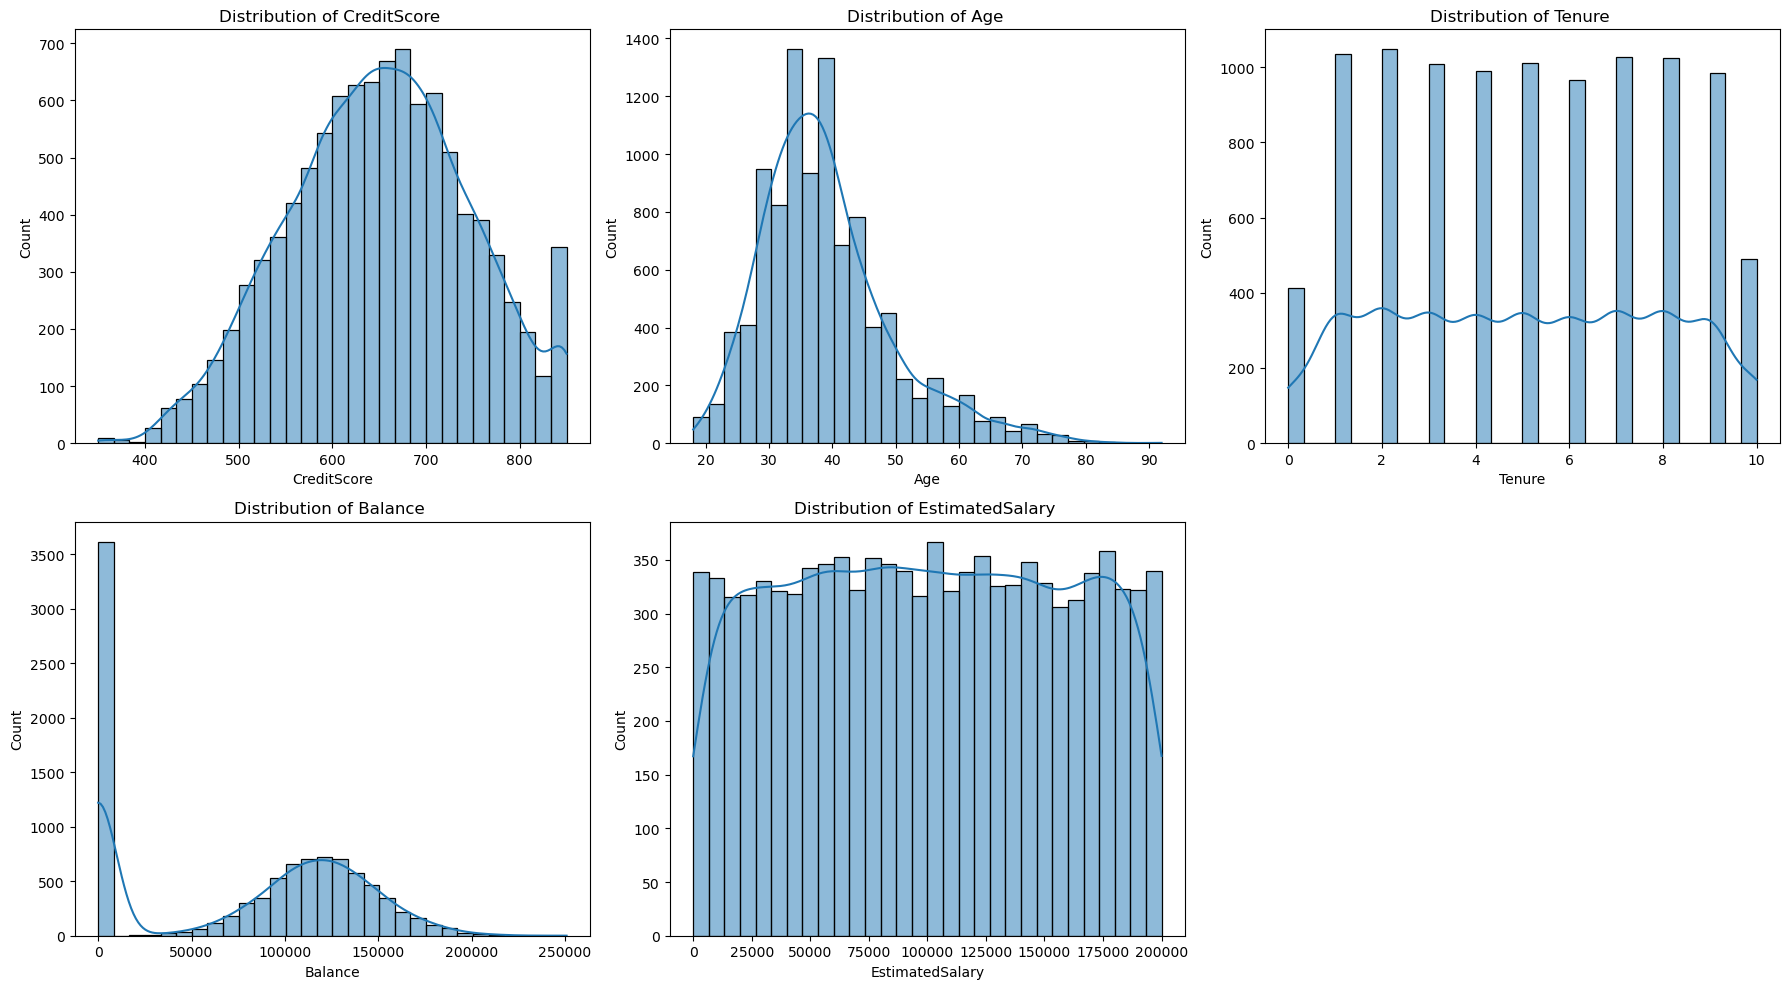

In [43]:
# Plot histograms to see effect
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col} ')

# Remove extra subplot if any
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [44]:
df = pd.get_dummies(df, columns=['Geography','Gender'],drop_first=True,dtype = int)

In [45]:
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8278,709,36,8,0.00,2,1,1,69676.55,0,0,0,0
3119,680,51,5,143139.87,1,0,0,47795.43,1,1,0,0
7560,512,51,6,144953.31,1,1,1,165035.17,0,0,0,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int32  
 10  Geography_Spain    10000 non-null  int32  
 11  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


In [47]:
df.shape

(10000, 12)

In [48]:
X = df.drop(columns="Exited")
y = df['Exited']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [52]:
import warnings
warnings.filterwarnings("ignore")

def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", [
        "RandomForest", "LogisticRegression", "DecisionTree",
        "KNN", "XGBoost", "LightGBM", "CatBoost", "AdaBoost"
    ])

    if classifier_name == "RandomForest":
        clf = RandomForestClassifier(
            n_estimators=trial.suggest_int("rf_n_estimators", 50, 300),
            max_depth=trial.suggest_int("rf_max_depth", 2, 32, log=True),
            random_state=42
        )

    elif classifier_name == "LogisticRegression":
        clf = make_pipeline(
            StandardScaler(),
            LogisticRegression(
                C=trial.suggest_float("lr_C", 1e-3, 1e2, log=True),
                solver="liblinear",
                random_state=42
            )
        )

    elif classifier_name == "DecisionTree":
        clf = DecisionTreeClassifier(
            max_depth=trial.suggest_int("dt_max_depth", 2, 32, log=True),
            min_samples_split=trial.suggest_int("dt_min_samples_split", 2, 20),
            random_state=42
        )

    elif classifier_name == "KNN":
        clf = make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(n_neighbors=trial.suggest_int("knn_n_neighbors", 3, 15))
        )

    elif classifier_name == "XGBoost":
        clf = XGBClassifier(
            n_estimators=trial.suggest_int("xgb_n_estimators", 50, 300),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 12),
            learning_rate=trial.suggest_float("xgb_learning_rate", 0.01, 0.3),
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

    elif classifier_name == "LightGBM":
        clf = LGBMClassifier(
            n_estimators=trial.suggest_int("lgb_n_estimators", 50, 300),
            max_depth=trial.suggest_int("lgb_max_depth", 3, 12),
            learning_rate=trial.suggest_float("lgb_learning_rate", 0.01, 0.3),
            random_state=42
        )

    elif classifier_name == "CatBoost":
        clf = CatBoostClassifier(
            iterations=trial.suggest_int("cat_iterations", 50, 300),
            depth=trial.suggest_int("cat_depth", 3, 10),
            learning_rate=trial.suggest_float("cat_learning_rate", 0.01, 0.3),
            verbose=0,
            random_state=42
        )

    elif classifier_name == "AdaBoost":
        clf = AdaBoostClassifier(
            n_estimators=trial.suggest_int("ada_n_estimators", 50, 300),
            learning_rate=trial.suggest_float("ada_learning_rate", 0.01, 1.0),
            random_state=42
        )

    # Evaluate using cross-validation
    return cross_val_score(clf, X_train, y_train, n_jobs=-1, cv=3, scoring="accuracy").mean()


In [53]:
# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best result
print("✅ Best Trial:")
print(f"Accuracy: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-04-06 13:53:06,231] A new study created in memory with name: no-name-0cd2863e-6993-4b99-b35c-bd7f26c6586c
[I 2025-04-06 13:53:14,991] Trial 0 finished with value: 0.8158747598410664 and parameters: {'classifier': 'KNN', 'knn_n_neighbors': 3}. Best is trial 0 with value: 0.8158747598410664.
[I 2025-04-06 13:53:19,965] Trial 1 finished with value: 0.8618744487396691 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 132, 'rf_max_depth': 8}. Best is trial 1 with value: 0.8618744487396691.
[W 2025-04-06 13:53:25,862] Trial 2 failed with parameters: {'classifier': 'CatBoost', 'cat_iterations': 96, 'cat_depth': 6, 'cat_learning_rate': 0.24420397213064565} because of the following error: The value nan is not acceptable.
[W 2025-04-06 13:53:25,864] Trial 2 failed with value nan.
[I 2025-04-06 13:53:32,577] Trial 3 finished with value: 0.8477498545990079 and parameters: {'classifier': 'LightGBM', 'lgb_n_estimators': 241, 'lgb_max_depth': 9, 'lgb_learning_rate': 0.23436638

✅ Best Trial:
Accuracy: 0.8646243863178018
Params:
  classifier: RandomForest
  rf_n_estimators: 164
  rf_max_depth: 10


In [54]:

def rf_objective(trial):
    # Hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 800, step=50)
    max_depth = trial.suggest_int('max_depth', 2, 32, step=2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Model initialization
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    # Cross-validation score (you can also use train_test_split if preferred)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return np.mean(score)

# Start the study
study = optuna.create_study(direction='maximize')
study.optimize(rf_objective, n_trials=50)

# Best hyperparameters
print("✅ Best RandomForest Hyperparameters:")
print(study.best_params)

[I 2025-04-06 13:59:05,646] A new study created in memory with name: no-name-5d9b77be-ce7b-47a9-ab84-956f412a859f
[I 2025-04-06 13:59:14,313] Trial 0 finished with value: 0.864625 and parameters: {'n_estimators': 600, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.864625.
[I 2025-04-06 13:59:20,927] Trial 1 finished with value: 0.8627499999999999 and parameters: {'n_estimators': 300, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.864625.
[I 2025-04-06 13:59:28,913] Trial 2 finished with value: 0.8632500000000001 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.864625.
[I 2025-04-06 13:59:48,796] Trial 3 finished with value: 0.8625 and parameters: {'n_estimators': 750, 'max_depth': 32, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_feat

✅ Best RandomForest Hyperparameters:
{'n_estimators': 450, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}


In [55]:
best_params = study.best_params
final_model = RandomForestClassifier(
    **best_params, random_state = 42, n_jobs =-1
)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [56]:

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8645


In [48]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [49]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [55]:
X_train.shape[1]

10

In [56]:
model = Sequential([
        Dense(64,input_shape=(X_train.shape[1],)),
        LeakyReLU(0.01),
        Dropout(0.2),
        Dense(64),
        LeakyReLU(0.01),
        Dropout(0.2),
        Dense(32),
        LeakyReLU(0.01),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')
])
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=16,  
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

C:\Users\Utkarsh Rai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7979 - loss: 0.4891 - val_accuracy: 0.8230 - val_loss: 0.4023
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8171 - loss: 0.4068 - val_accuracy: 0.8465 - val_loss: 0.3689
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8288 - loss: 0.3887 - val_accuracy: 0.8450 - val_loss: 0.3697
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8387 - loss: 0.3742 - val_accuracy: 0.8505 - val_loss: 0.3601
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8392 - loss: 0.3809 - val_accuracy: 0.8515 - val_loss: 0.3589
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8436 - loss: 0.3775 - val_accuracy: 0.8525 - val_loss: 0.3511
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8550 - loss: 0.3464 - val_accuracy: 0.8550 - val_loss: 0.3508
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8547 - loss: 0.3545 - val_acc

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 0.3463
Test Accuracy: 0.8540


In [57]:
import pickle
with open('bank_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
